In [1]:
import json
import pickle

#!pip install pycocotools
from pycocotools.coco import COCO

In [2]:
# importing and indexing coco dataset

# download 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip'
# and 'http://images.cocodataset.org/zips/train2014.zip'
# and unzip them in 'data_path'

data_path = '/media/dlo/New Volume/captioning_data/'
caption_path = f'{data_path}annotations/'

coco = COCO(f'{caption_path}instances_train2014.json')
coco_caption = COCO(f'{caption_path}captions_train2014.json')
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=6.52s)
creating index...
index created!
loading annotations into memory...
Done (t=0.41s)
creating index...
index created!


In [3]:
# creating index for images and their annotations:
# {image_name : [annotation_0, ..., annotation_N]}
# each image can have multiple annotations

# getting images
img_ids = [coco.anns[im_id]['image_id'] for im_id in ids]
imgs = coco.loadImgs(img_ids)

# getting annotations
ann_ids = coco_caption.getAnnIds(imgIds = img_ids)
anns = coco_caption.loadAnns(ann_ids)

# multiple annotations per image, creating dict
# {image_id : [caption_0, ..., caption_N]}
img_anns = {}
for ann in anns:
    if ann['image_id'] not in img_anns:
        img_anns[ann['image_id']] = {ann['caption']}
    else:
        img_anns[ann['image_id']].update({ann['caption']})
        
# getting file names corresponding to image_ids
id_name_dict = {img['id']: img['file_name'] for img in imgs}
img_anns = {id_name_dict[im] : anns for im, anns in img_anns.items()}

In [4]:
# saving index
with open(f'{data_path}index.pkl', 'wb') as f:
    pickle.dump(img_anns, f, protocol = pickle.HIGHEST_PROTOCOL)

#### some images and their annotations

In [5]:
import matplotlib.pyplot as plt
import skimage.io as io 
%matplotlib inline

{'A close-up of a person holding hot dog to the camera.',
 'A hand holding a hot dog in a paper container covered in mustard and ketchup.',
 'A hand holds a traditional loaded ballgame hotdog.',
 'A person holding a hot dog with yellow mustard and onions on it, at a sports stadium.',
 'A person holding up a hot dog at a ball park.'}

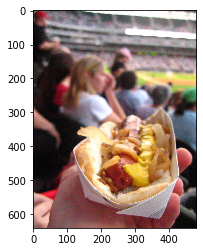

In [6]:
im_name = list(img_anns)[0]

I = io.imread(data_path + 'train2014/' + im_name)
plt.imshow(I)
img_anns[im_name]

{'A plate white hotdogs, onion and ketchup and salsa.',
 'Hot dogs covered in mustard with a side salad on a plate',
 'The meal is served and ready to be eaten. ',
 'There are two hotdogs and salad with two drinks. ',
 'Two hotdogs in a large plate with extra toppings.'}

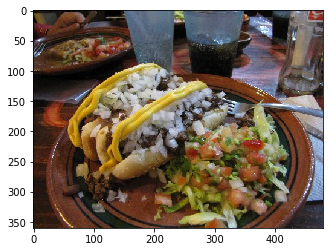

In [7]:
im_name = list(img_anns)[10]

I = io.imread(data_path + 'train2014/' + im_name)
plt.imshow(I)
img_anns[im_name]